In [1]:
import graphlab
import pandas
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to santosh.chilkunda@gmail.com and will expire on July 20, 2017.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1483674342.log


In [2]:
house_data = graphlab.SFrame('kc_house_data.gl/')

In [3]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [4]:
t_v, test = house_data.random_split(0.9, seed=1)
training, validation = t_v.random_split(0.5, seed=1)

In [5]:
def get_residual_sum_of_squares(target, pred):
    #error = (target - pred)
    #sq_err = (error*error)
    #sq_err2 = np.array(sq_err)
    #RSS = np.sum(sq_err2)
    RSS = ((pred - target) * (pred - target)).sum()
    return(RSS)

In [6]:
def run_assignment3(training, power, validation):
    poly_data = polynomial_sframe(training['sqft_living'], power)
    my_features = poly_data.column_names()
    poly_data['price'] = training['price']
    
    lin_reg_model = graphlab.linear_regression.create(poly_data, features=my_features, target='price', validation_set=None, verbose=False)
    
    poly_validation = polynomial_sframe(validation['sqft_living'], power)
    poly_validation['price'] = validation['price']
    pred = lin_reg_model.predict(poly_validation)
    
    return (get_residual_sum_of_squares(poly_validation['price'], pred))

In [7]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_sframe[name] to be feature^power
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [8]:
for power in range(1,16):
    RSS = run_assignment3(training, power, validation)
    print RSS

6.29097392477e+14
6.23953218718e+14
6.25827565374e+14
6.29941747474e+14
6.20917933483e+14
5.63138360218e+14
6.61891178609e+14
9.31498626958e+14
1.29127780213e+15
1.56881670907e+15
1.54825215932e+15
1.14515709809e+15
6.26265431722e+14
9.30709385149e+14
4.14434360187e+15


In [9]:
p = 6
poly_data = polynomial_sframe(training['sqft_living'], p)
my_features = poly_data.column_names()
poly_data['price'] = training['price']
lin_reg_model = graphlab.linear_regression.create(poly_data, features=my_features, target='price', validation_set=None, verbose=False)
poly_test = polynomial_sframe(test['sqft_living'], p)
pred = lin_reg_model.predict(poly_test)
RSS = get_residual_sum_of_squares(test['price'], pred)
print RSS

1.34653116549e+14


In [10]:
poly1_data = polynomial_sframe(house_data['sqft_living'], 1)
my_features = poly1_data.column_names()
poly1_data['price'] = house_data['price']
model1 = graphlab.linear_regression.create(poly1_data, features=my_features, target='price', validation_set=None, verbose=False)

In [11]:
model1.get('coefficients')

name,index,value,stderr
(intercept),None,-43579.0852515,4402.68969743
power_1,None,280.622770886,1.93639855513


In [12]:
poly1_data[0]

{'power_1': 1180.0, 'price': 221900.0}

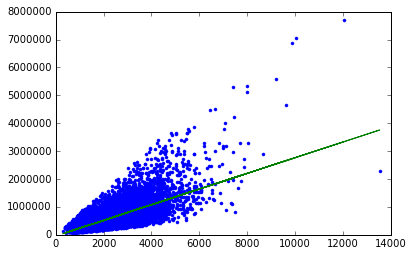

In [13]:
plt.plot(poly1_data['power_1'], poly1_data['price'], '.',
         poly1_data['power_1'], model1.predict(poly1_data), '-')

In [14]:
poly2_data = polynomial_sframe(house_data['sqft_living'], 2)
my_features = poly2_data.column_names()
poly2_data['price'] = house_data['price']
model2 = graphlab.linear_regression.create(poly2_data, features=my_features, target='price', validation_set=None, verbose=True)

Linear regression:

--------------------------------------------------------

Number of examples          : 21613

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.031769     | 5913020.984255     | 250948.368758 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [15]:
model2.get('coefficients')

name,index,value,stderr
(intercept),None,199222.496445,7058.00483552
power_1,None,67.9940640677,5.28787201316
power_2,None,0.0385812312789,0.000898246547032


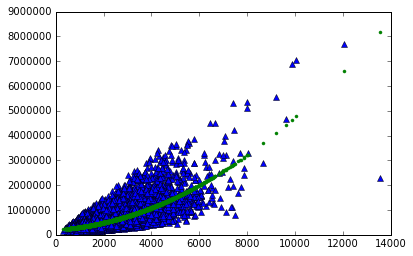

In [16]:
plt.plot(poly2_data['power_1'], poly2_data['price'], '^',
         poly2_data['power_1'], model2.predict(poly2_data), '.')

In [17]:
training_data = pandas.read_csv('wk3_kc_house_train_data.csv')
test_data = pandas.read_csv('wk3_kc_house_test_data.csv')
validation_data = pandas.read_csv('wk3_kc_house_valid_data.csv')

In [18]:
from sklearn import linear_model

In [19]:
reg = linear_model.LinearRegression()

In [20]:
x_data1 = np.array(house_data['sqft_living'])
x_data = x_data1.reshape(len(x_data1), 1)
y_data = np.array(house_data['price'])

In [21]:
x_data.shape

(21613, 1)

In [22]:
reg.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
reg.coef_

array([ 280.62356663])

In [24]:
model1.predict(poly1_data[1000])

dtype: float
Rows: 1
[469960.58546965045]

In [25]:
np.mean(((reg.predict(x_data) - y_data)**2))/1000000000

68.351287053698741

In [26]:
(get_residual_sum_of_squares(poly1_data['price'], model1.predict(poly1_data)) / 1000000000)

1477276.367103137

In [27]:
x_data[1000]

array([ 1830.])

In [28]:
reg.intercept_

-43580.740327085601

In [29]:
reg.coef_[0]

280.62356663364551

In [30]:
house_data.column_names()

['id',
 'date',
 'price',
 'bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [31]:
x_data1 = np.append(house_data['sqft_living'], house_data['bedrooms'], 0)
x_data2 = np.append(x_data1, house_data['bathrooms'], 0)
x_data3 = x_data2.reshape(3, len(x_data2)/3)
x_data  = x_data3.transpose()

y_data = np.array(house_data['price'])

In [32]:
reg2 = linear_model.LinearRegression()

In [33]:
reg2.fit(x_data, y_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
reg2.intercept_

74847.141678696848

In [35]:
reg2.coef_

array([   309.39238803, -57860.8937291 ,   7932.71299228])

In [36]:
x_data[1000,:]

array([ 1830.,     4.,     2.])

In [37]:
reg2.predict(x_data[1000,:])

/Users/santosh/anaconda/envs/gl-env/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 425457.06284808])

In [38]:
y_data[1000]

700000.0

In [39]:
np.mean(((reg2.predict(x_data) - y_data)**2))/1000000000

66.455447787229119

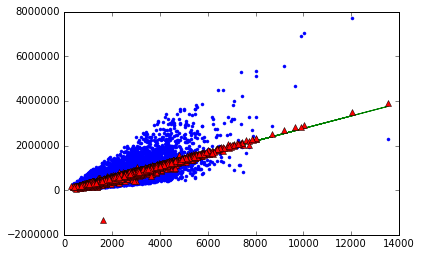

In [40]:
plt.plot(poly1_data['power_1'], poly1_data['price'],'.',
         poly1_data['power_1'], model1.predict(poly1_data),'g',
         poly1_data['power_1'], reg2.predict(x_data),'r^')